# Exercícios de mosaico de gráficos

Considere os dados da primeira célula para um aplicativo de uma pequena empresa de software. Faça um mosaico com 4 gráficos:

1. Gráfico de linhas com os novos usuários por mês
2. Gráfico de barras com a receita mensal
3. Gráfico de linhas com os usuários ativos diários
4. Gráfico de barras empilhadas com os tickets de suporte abertos e fechados

Os gráficos 1 e 2 devem ter uma linha própria no mosaico. Os gráficos 3 e 4 devem compartilhar a mesma linha.


In [ ]:
!pip3 install matplotlib

In [106]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
novos_usuarios = [100, 80, 110, 140, 150, 160, 170, 120, 110, 150, 200, 140]
usuarios_ativos_diarios = [1000, 750, 900, 1300, 1400, 1500, 1200, 1200, 1500, 1900, 2000, 1800]
receita_mensal = [10000, 8500, 9800, 10000, 11000, 12000, 10000, 10500, 13000, 13000, 20000, 17000]
tickets_suporte_abertos = [110, 75, 100, 140, 170, 160, 100, 130, 190, 200, 210, 140]
tickets_suporte_fechados = [100, 85, 100, 120, 130, 150, 140, 110, 130, 120, 150, 200]


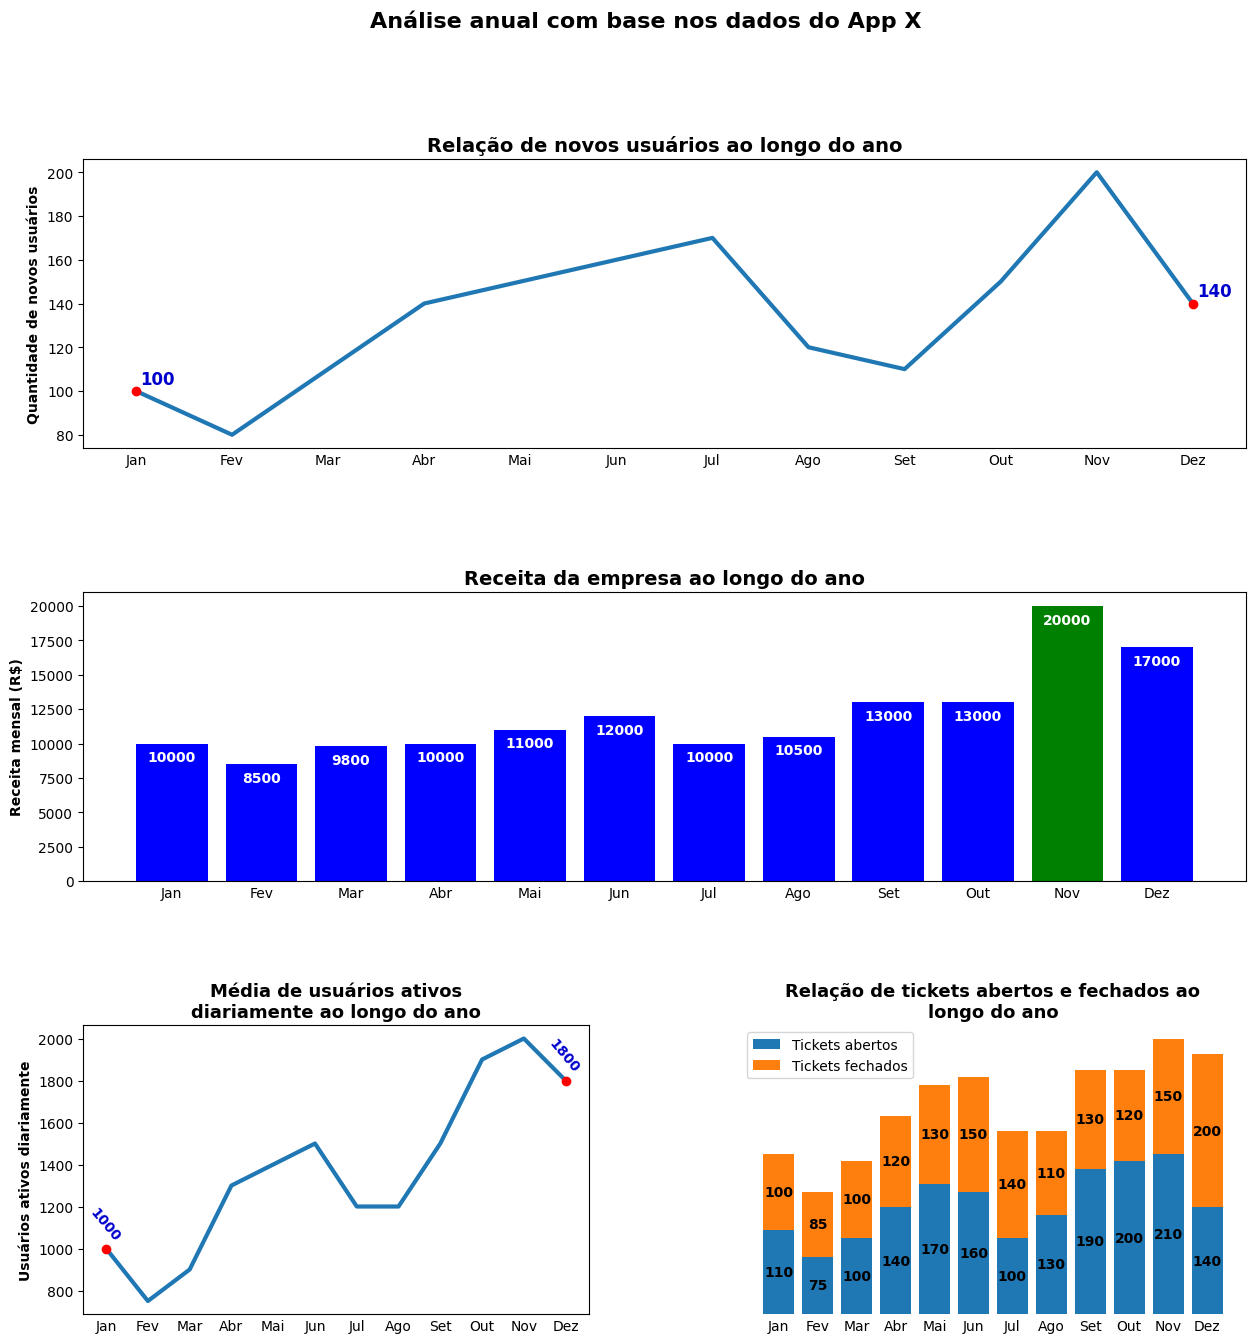

In [107]:
import matplotlib.pyplot as plt

mosaico = 'AA;BB;CD'

fig = plt.figure(figsize=(15,15))
espacamento = {'wspace': 0.3, 'hspace': 0.5}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

# 1. Gráfico de linhas com os novos usuários por mês
axs['A'].plot(meses, novos_usuarios, linewidth='3')

for posicao in (0, -1):
    axs['A'].scatter(meses[posicao], novos_usuarios[posicao], color='red', zorder=2)
    axs['A'].annotate(novos_usuarios[posicao], color='mediumblue', xy=(meses[posicao], novos_usuarios[posicao]), xytext=(3,5), textcoords='offset points', size=12, weight='bold')

axs['A'].tick_params(axis='x', length=0)
axs['A'].set_ylabel('Quantidade de novos usuários', fontweight='bold')
axs['A'].set_title('Relação de novos usuários ao longo do ano', fontweight='bold', fontsize=14)

# 2. Gráfico de barras com a receita mensal

# capturando o indice da maior receita mensal
indice_maior_valor_receita = receita_mensal.index(max(receita_mensal))

barras = axs['B'].bar(meses, receita_mensal, color=['blue' if pos != indice_maior_valor_receita else 'green' for pos in range(len(receita_mensal))])

axs['B'].bar_label(barras, labels=receita_mensal, fontweight='bold', padding=-15, color='white')

axs['B'].tick_params(axis='x', length=0)

axs['B'].set_ylabel('Receita mensal (R$)', fontweight='bold')
axs['B'].set_title('Receita da empresa ao longo do ano', fontweight='bold', fontsize=14)


# 3. Gráfico de linhas com os usuários ativos diários
axs['C'].plot(meses, usuarios_ativos_diarios, linewidth=3)

for posicao in (0, -1):
    axs['C'].scatter(meses[posicao], usuarios_ativos_diarios[posicao], color='red', zorder=2)
    axs['C'].annotate(usuarios_ativos_diarios[posicao], color='mediumblue', xy=(meses[posicao], usuarios_ativos_diarios[posicao]), xytext=(-14,6), textcoords='offset points', weight='bold', rotation=-50, fontsize=10)

axs['C'].tick_params(axis='x', length=0)
axs['C'].set_ylabel('Usuários ativos diariamente', fontweight='bold')
axs['C'].set_title('Média de usuários ativos\ndiariamente ao longo do ano', fontweight='bold', fontsize=13)

# 4. Gráfico de barras empilhadas com os tickets de suporte abertos e fechados
barras_tickes_abertos = axs['D'].bar(meses, tickets_suporte_abertos, label='Tickets abertos')
barras_tickes_fechados = axs['D'].bar(meses, tickets_suporte_fechados, bottom=tickets_suporte_abertos, label='Tickets fechados')

axs['D'].bar_label(barras_tickes_abertos, labels=tickets_suporte_abertos, label_type='center', fontweight='bold')
axs['D'].bar_label(barras_tickes_fechados, labels=tickets_suporte_fechados, label_type='center', fontweight='bold')

axs['D'].tick_params(axis='x', length=0)
axs['D'].set_yticks([])

axs['D'].set_title('Relação de tickets abertos e fechados ao\nlongo do ano', fontsize=13, fontweight='bold')
axs['D'].legend()
axs['D'].set_frame_on(False)

# ajustes finais
fig.suptitle('Análise anual com base nos dados do App X', fontweight='bold', fontsize=16)

plt.show()